In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# === RUTA DE TU ARCHIVO (ya ajustada a lo que me pasaste) ===
CSV_PATH = r"C:\Users\sebas\Downloads\spotify (1).csv"

df = pd.read_csv(CSV_PATH)

# Algunas versiones del dataset traen una columna índice "Unnamed: 0"
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

df.head(3)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [2]:
print("Filas:", len(df))
print("Columnas:", df.shape[1])
print("\nColumnas:", df.columns.tolist())

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores faltantes por columna:")
print(df.isna().sum().sort_values(ascending=False))


Filas: 114000
Columnas: 20

Columnas: ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

Tipos de datos:
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Valores faltantes por columna:
artists             1
album_name          1
track_name          1
track_id   

In [3]:
numeric_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

print("Numéricas:", numeric_cols)
print("Categóricas:", categorical_cols)


Numéricas: ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Categóricas: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


In [4]:
min_max = df[numeric_cols].agg(["min", "max"]).T
min_max


,min,max
popularity,0,100
duration_ms,0,5237295
explicit,False,True
danceability,0.0,0.985
energy,0.0,1.0
key,0,11
loudness,-49.531,4.532
mode,0,1
speechiness,0.0,0.965
acousticness,0.0,0.996


In [5]:
stats = pd.DataFrame({
    "mean": df[numeric_cols].mean(numeric_only=True),
    "median": df[numeric_cols].median(numeric_only=True),
    "std": df[numeric_cols].std(numeric_only=True, ddof=1),
    "min": df[numeric_cols].min(numeric_only=True),
    "max": df[numeric_cols].max(numeric_only=True),
}).round(4)

stats


,mean,median,std,min,max
popularity,33.2385,35.0000,22.3051,0,100
duration_ms,228029.1531,212906.0000,107297.7126,0,5237295
explicit,0.0855,0.0000,0.2796,False,True
danceability,0.5668,0.5800,0.1735,0.0,0.985
energy,0.6414,0.6850,0.2515,0.0,1.0
key,5.3091,5.0000,3.5600,0,11
loudness,-8.2590,-7.0040,5.0293,-49.531,4.532
mode,0.6376,1.0000,0.4807,0,1
speechiness,0.0847,0.0489,0.1057,0.0,0.965
acousticness,0.3149,0.1690,0.3325,0.0,0.996


In [6]:
if "duration_ms" in df.columns:
    df["duration_min"] = df["duration_ms"] / 60000
    df[["duration_ms", "duration_min"]].describe().T
else:
    print("No se encontró la columna 'duration_ms'.")


In [7]:
conclusiones = []

# Tamaño y estructura
conclusiones.append(f"El dataset contiene {len(df):,} registros y {df.shape[1]} variables.")
conclusiones.append(
    "Incluye variables categóricas (por ejemplo: 'track_id', 'artists', 'album_name', 'track_name', 'track_genre') "
    "y numéricas (por ejemplo: 'popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', "
    "'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'key', 'mode', 'time_signature')."
)

# Popularidad
if "popularity" in df.columns:
    pop_mean = df["popularity"].mean()
    pop_median = df["popularity"].median()
    pop_std = df["popularity"].std()
    conclusiones.append(
        f"La popularidad presenta media ≈ {pop_mean:.2f}, mediana {pop_median:.0f} y desviación estándar ≈ {pop_std:.2f}; "
        "esto indica alta dispersión y concentración en valores bajos/medios según la distribución típica."
    )

# Duración
if "duration_ms" in df.columns:
    dur_mean_min = df["duration_ms"].mean() / 60000
    dur_median_min = df["duration_ms"].median() / 60000
    conclusiones.append(
        f"La duración típica de las pistas se ubica alrededor de {dur_median_min:.2f} minutos (mediana), "
        f"con una media de {dur_mean_min:.2f} minutos; existen outliers de duración muy corta o muy extensa."
    )

# Variables de audio 0–1 (si existen)
for col in ["danceability","energy","valence"]:
    if col in df.columns:
        conclusiones.append(
            f"{col.capitalize()} promedio ≈ {df[col].mean():.2f} (escala 0–1), lo que sugiere un comportamiento central moderado."
        )

# Explícitas
if "explicit" in df.columns and df["explicit"].dtype == bool:
    conclusiones.append(f"La proporción de pistas explícitas es ≈ {df['explicit'].mean()*100:.2f}%.")

# Rangos
if len(numeric_cols) > 0:
    conclusiones.append("Los rangos (mín–máx) por variable numérica confirman la amplitud del conjunto; "
                        "en particular, 'duration_ms' y 'tempo' pueden requerir revisión de outliers para análisis más robustos.")

print("\n".join(conclusiones))


El dataset contiene 114,000 registros y 21 variables.
Incluye variables categóricas (por ejemplo: 'track_id', 'artists', 'album_name', 'track_name', 'track_genre') y numéricas (por ejemplo: 'popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'key', 'mode', 'time_signature').
La popularidad presenta media ≈ 33.24, mediana 35 y desviación estándar ≈ 22.31; esto indica alta dispersión y concentración en valores bajos/medios según la distribución típica.
La duración típica de las pistas se ubica alrededor de 3.55 minutos (mediana), con una media de 3.80 minutos; existen outliers de duración muy corta o muy extensa.
Danceability promedio ≈ 0.57 (escala 0–1), lo que sugiere un comportamiento central moderado.
Energy promedio ≈ 0.64 (escala 0–1), lo que sugiere un comportamiento central moderado.
Valence promedio ≈ 0.47 (escala 0–1), lo que sugiere un comportamiento central moderado.
La proporció

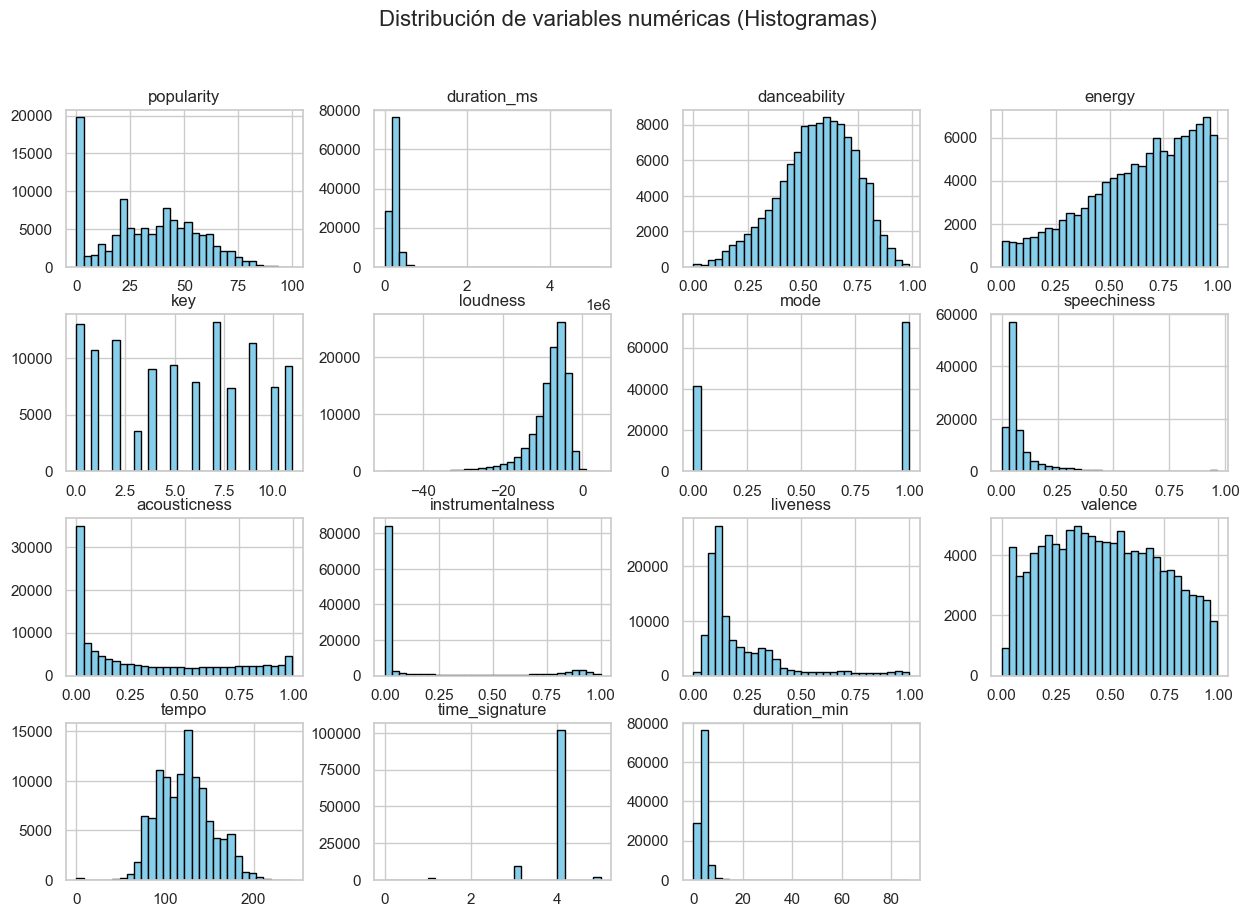

In [8]:
# Histogramas para visualizar la distribución de cada variable numérica
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()

# Trazamos histogramas en una cuadrícula
df[numeric_cols].hist(figsize=(15, 10), bins=30, color="skyblue", edgecolor="black")
plt.suptitle("Distribución de variables numéricas (Histogramas)", fontsize=16)
plt.show()


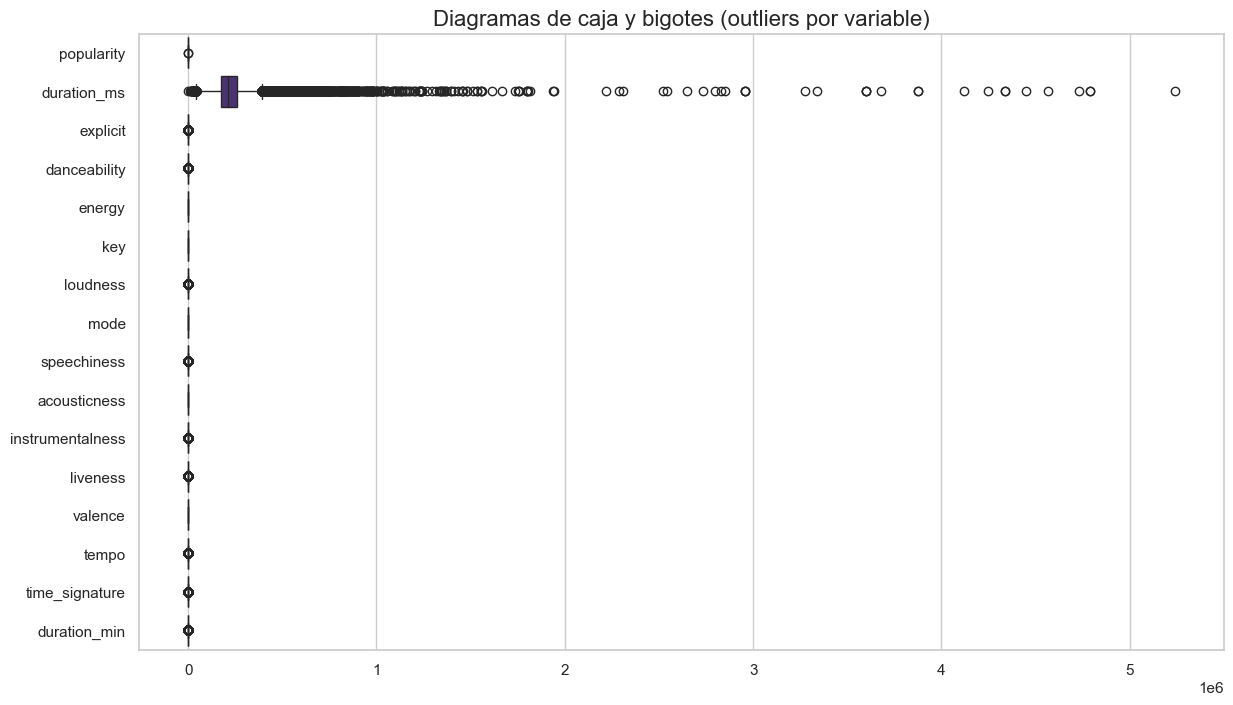

In [9]:
# Diagramas de cajas para ver valores atípicos (outliers)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numeric_cols], orient="h", palette="viridis")
plt.title("Diagramas de caja y bigotes (outliers por variable)", fontsize=16)
plt.show()


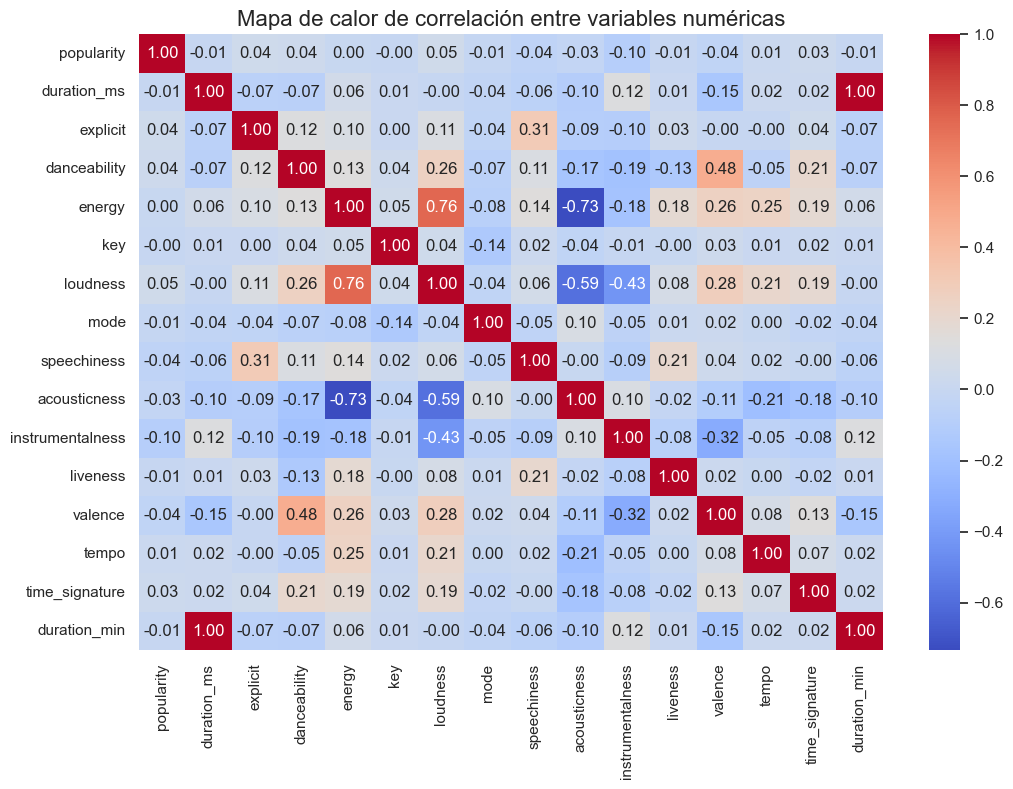

In [10]:
# Mapa de calor de correlaciones entre variables numéricas
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación entre variables numéricas", fontsize=16)
plt.show()


In [11]:
# Revisar columnas con un solo valor o muy poca variación
unique_counts = df.nunique().sort_values()
print("Valores únicos por columna:\n")
print(unique_counts)

low_info_cols = unique_counts[unique_counts <= 1].index.tolist()
print("\nColumnas que no aportan información (solo un valor):", low_info_cols)


Valores únicos por columna:

explicit                2
mode                    2
time_signature          5
key                    12
popularity            101
track_genre           114
danceability         1174
speechiness          1489
liveness             1722
valence              1790
energy               2083
acousticness         5061
instrumentalness     5346
loudness            19480
artists             31437
tempo               45653
album_name          46589
duration_min        50697
duration_ms         50697
track_name          73608
track_id            89741
dtype: int64

Columnas que no aportan información (solo un valor): []


In [12]:
# Analicemos grupos promedio por género (track_genre) o por artistas si hay demasiados géneros repetidos
if "track_genre" in df.columns:
    group_stats = df.groupby("track_genre")[["danceability", "energy", "valence", "tempo"]].mean().sort_values("energy", ascending=False)
    display(group_stats.head(10))
else:
    print("No existe la columna 'track_genre' en este dataset.")


,danceability,energy,valence,tempo
track_genre,,,,
death-metal,0.368411,0.931470,0.247611,123.779016
grindcore,0.271854,0.924201,0.216434,119.229915
metalcore,0.423800,0.914485,0.314902,130.580195
happy,0.552847,0.910971,0.327467,152.908962
hardstyle,0.539229,0.901246,0.311888,146.837452
drum-and-bass,0.535486,0.876635,0.321474,155.241712
black-metal,0.296411,0.874897,0.191736,128.601515
heavy-metal,0.428500,0.874003,0.388203,126.613907
party,0.667191,0.871237,0.681235,131.300322


In [14]:
import pandas as pd
import numpy as np

# Asegurarnos de tener el dataframe cargado
if 'df' not in locals():
    CSV_PATH = r"C:\Users\sebas\Downloads\spotify (1).csv"
    df = pd.read_csv(CSV_PATH)
    if "Unnamed: 0" in df.columns:
        df = df.drop(columns=["Unnamed: 0"])

# Eliminamos columnas no útiles para clustering
# track_id, track_name, album_name y artists no aportan información numérica
cols_to_drop = ["track_id", "track_name", "album_name", "artists", "track_genre"]
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print(f"DataFrame limpio con {df_clean.shape[1]} variables numéricas para análisis.")
df_clean.head(3)


DataFrame limpio con 16 variables numéricas para análisis.


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,3.844433
1,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,2.493500
2,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,3.513767


In [15]:
# ==========================================
# K-MEANS CLUSTERING - ANÁLISIS DE SPOTIFY
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# === CARGAR DATOS ===
CSV_PATH = r"C:\Users\sebas\Downloads\spotify (1).csv"
df = pd.read_csv(CSV_PATH)

# Eliminar columna sin utilidad (según análisis anterior)
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Variables de identificación o texto que no aportan al clustering
cols_to_drop = ["track_id", "album_name", "track_name", "artists", "track_genre"]
df_num = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Confirmamos qué columnas quedan
print("Columnas numéricas que usaremos para K-Means:")
print(df_num.columns.tolist())

# Escalamos los datos (muy importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)


Columnas numéricas que usaremos para K-Means:
['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


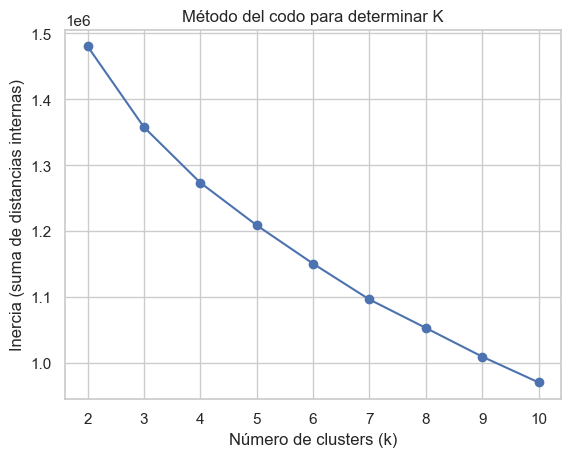

In [16]:
# Método del codo para decidir K
inertia = []
K_range = range(2, 11)  # probamos de 2 a 10 grupos

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Método del codo para determinar K")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (suma de distancias internas)")
plt.show()


In [17]:
# Elegimos el valor de k basado en el método del codo
k = 3  # <-- cámbialo si tu gráfico muestra otro codo

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Agregamos los resultados al DataFrame original
df["cluster"] = kmeans.labels_

print("Centros del clustering (en valores escalados):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=df_num.columns))


Centros del clustering (en valores escalados):
   popularity  duration_ms  explicit  danceability    energy       key  \
0   -0.107089    -0.099974 -0.299945     -0.596434 -1.365228 -0.099685   
1    0.125241    -0.221113  3.147326      0.391084  0.319489  0.012228   
2    0.020248     0.062712 -0.305721      0.152488  0.423653  0.032372   

   loudness      mode  speechiness  acousticness  instrumentalness  liveness  \
0 -1.200281  0.159119    -0.293985      1.314217          0.490438 -0.193648   
1  0.328260 -0.116086     1.235472     -0.263728         -0.346040  0.185916   
2  0.366328 -0.039158    -0.059974     -0.413503         -0.122218  0.041871   

    valence     tempo  time_signature  
0 -0.615812 -0.396554       -0.455884  
1 -0.011169 -0.025033        0.103821  
2  0.211222  0.138329        0.141840  


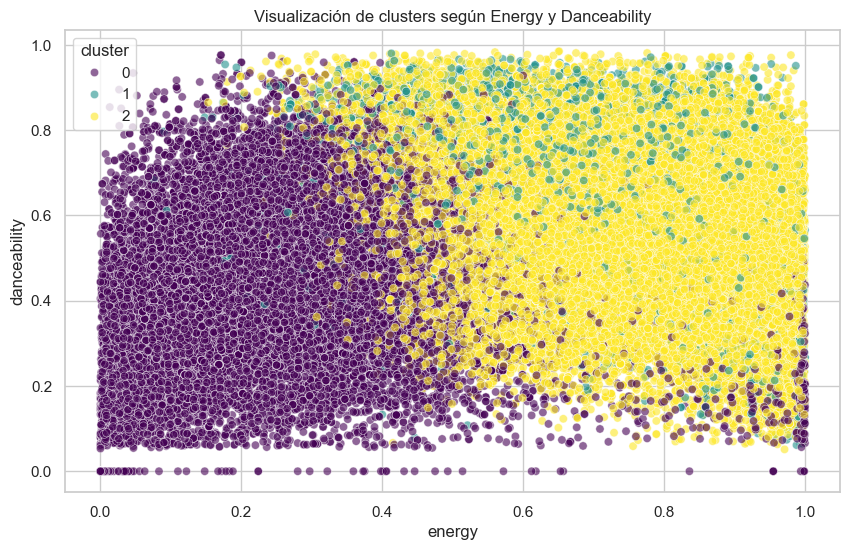

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="energy", y="danceability", hue="cluster", data=df, palette="viridis", alpha=0.6)
plt.title("Visualización de clusters según Energy y Danceability")
plt.show()


In [19]:
# Calculamos distancias entre centros
from scipy.spatial.distance import cdist

centers = kmeans.cluster_centers_
dist_matrix = cdist(centers, centers, metric="euclidean")
dist_df = pd.DataFrame(dist_matrix, columns=[f"C{i}" for i in range(k)], index=[f"C{i}" for i in range(k)])

print("Distancia entre los centros (valores altos = más separados):")
display(dist_df)


Distancia entre los centros (valores altos = más separados):


,C0,C1,C2
C0,0.000000,4.967927,3.333567
C1,4.967927,0.000000,3.733592
C2,3.333567,3.733592,0.000000
